In [258]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "~/Desktop/GitHubDataScienceUCI/Pyber/city_data.csv"
ride_data_to_load="~/Desktop/GitHubDataScienceUCI/Pyber/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_dataframe = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_dataframe.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [259]:
# Create separate data frames based on Urban, Suburban and Rural city types
urban_city = pyber_dataframe.loc[(pyber_dataframe["type"] == "Urban")]
suburban_city = pyber_dataframe.loc[(pyber_dataframe["type"] == "Suburban")]
rural_city = pyber_dataframe.loc[(pyber_dataframe["type"] == "Rural")]




In [260]:
# For Urban City calculations for Average Fare, Total Rides and Total Drivers 
average_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city'])['ride_id'].count()
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# For Suburban City calculations for Average Fare, Total Rides and Total Drivers 
average_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city'])['ride_id'].count()
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# For Rural City calculations for Average Fare, Total Rides and Total Drivers 
average_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city'])['ride_id'].count()
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

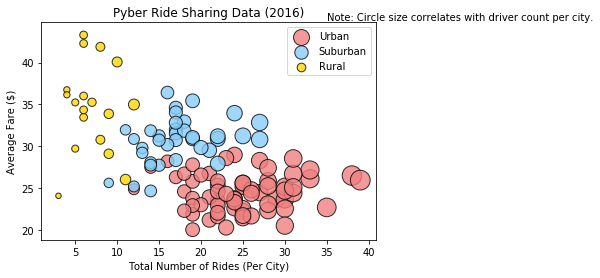

In [261]:
# Build scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban_city, average_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.8, label="Urban")

plt.scatter(total_rides_suburban_city, average_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.8, label="Suburban")

plt.scatter(total_rides_rural_city, average_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.8, label="Rural")


# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="upper right") 
plt.legend(loc='upper right')

# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Incorporate a text label regarding circle size
plt.text(35,45,"Note: Circle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig('/Users/anjalivardhan/Desktop/GitHubDataScienceUCI/Pyber/Pyber Ride Sharing Data_2016.png')

# Show plot
plt.show()


## Total Fares by City Type


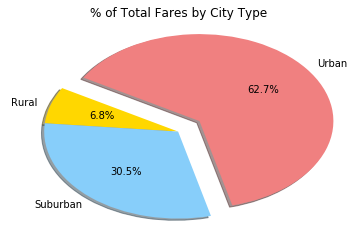

In [243]:
# Calculate Type Percents
group_type = pyber_dataframe.groupby(['type'])
sum_fare = group_type['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.2)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(sum_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#Save Figure
plt.savefig('/Users/anjalivardhan/Desktop/GitHubDataScienceUCI/Pyber/% of Total Fares by City Type')

# Show plot
plt.show()


#Total Rides by City Type

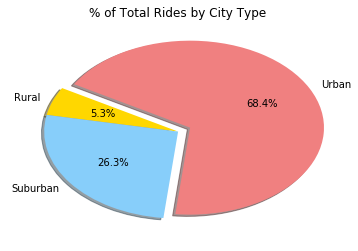

In [244]:
# Calculate Ride Percents
rides_count = group_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('/Users/anjalivardhan/Desktop/GitHubDataScienceUCI/Pyber/% of Total Rides by City Type')

# Show plot
plt.show()

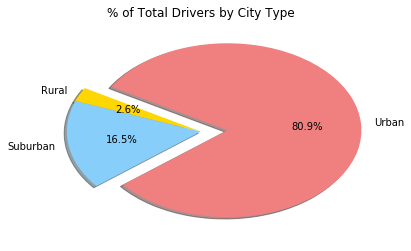

In [245]:
#Total Drivers by City Type

# Calculate Type Percents
group_drivers_type = city_data.groupby(['type'])
sum_drivers = group_drivers_type['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.2)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(sum_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('/Users/anjalivardhan/Desktop/GitHubDataScienceUCI/Pyber/% of Total Drivers by City Type')

# Show plot
plt.show()